In [38]:
import soundfile as sf
import sounddevice as sd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import echocomp

In [39]:
data = np.load('echocomp.npz')
s = data['s'] #signal from the far speaker
fs=8000
g1 = data['g1']
g2 = data['g2']
g3 = data['g3']

In [40]:
sd.play(s,fs)
#we lost the golden chain, those boxes were not

## 4.1

In [41]:
#parameters
#alpha = 0.1
#var = 0.16
#x = np.random.normal(scale=np.sqrt(var), size=16000)
#noise = np.zeros(16000)
#lh = 5 #arbitrary filter length
#nlms4echokomp(x,g1,noise,alpha,lh)

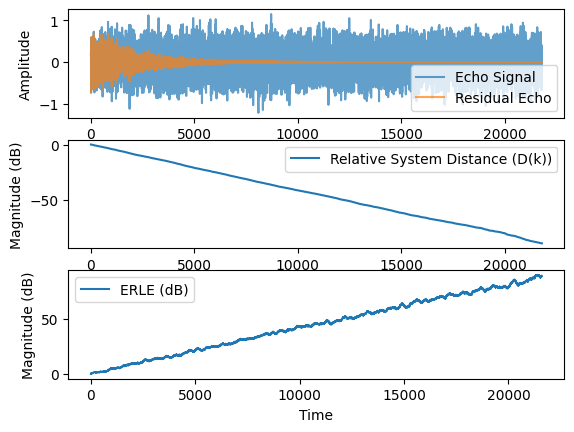

In [50]:
%run echocomp.py 1
#no background noise or speech by the near speaker, so the relative system distance converges steadily
#

## 4.2

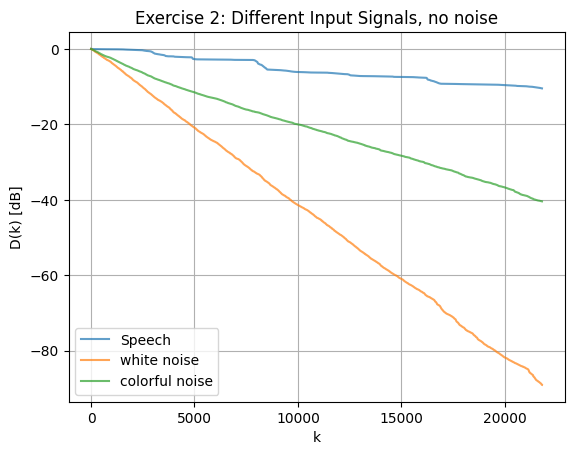

In [43]:
%run echocomp.py 2
# Higher input signal uniformity causes good convergence behaviour
# White noise is very uniform compared to speech -> faster convergence

## 4.3

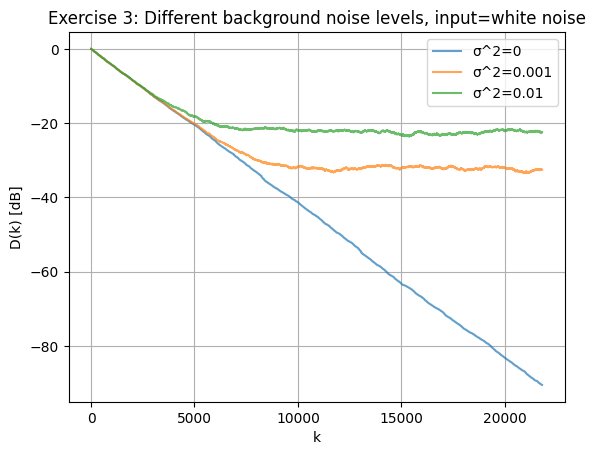

In [44]:
%run echocomp.py 3
# White noise as input signal
# With higher background noise levels
# The relative system distance converges quicker to a worse value
# relative to the amount of noise

## 4.4

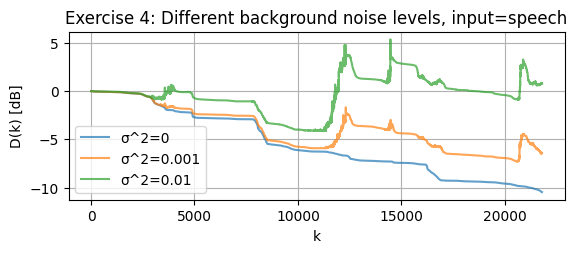

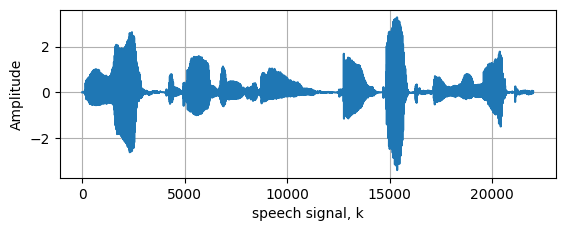

In [45]:
plt.subplot(2,1,1)
%run echocomp.py 4
plt.subplot(2,1,2)
plt.grid(True)
plt.xlabel('speech signal, k')
plt.ylabel('Amplitude')
_=plt.plot(s)
# With higher noise variances and speech as input signal
# The relative system distance converges more slowly
# and diverges when the input speech changes
# Adaptation should be frozen when the near-end speaker speaks
# as when they stop speaking, the adaptation is far off from the echoing speech of the far speaker
# -> relative system distance goes up
# In the case of no background noise the system distance keeps going down

## 4.5

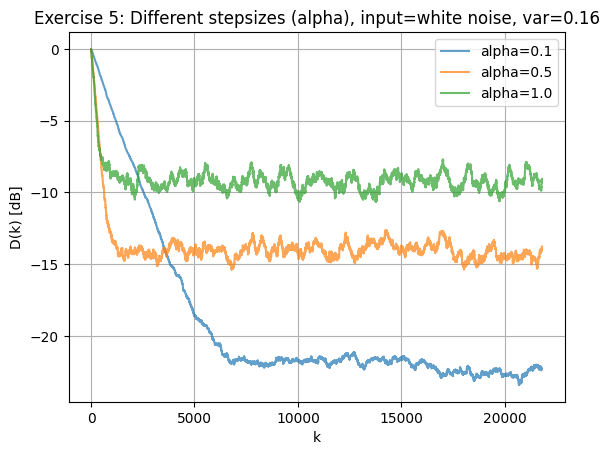

In [46]:
%run echocomp.py 5
# Larger alpha values cause faster convergence, but much worse
# final system distance values
# Large alpha values cause faster change in the beginning, but after a certain point can't keep up with the changing noise

## 4.6

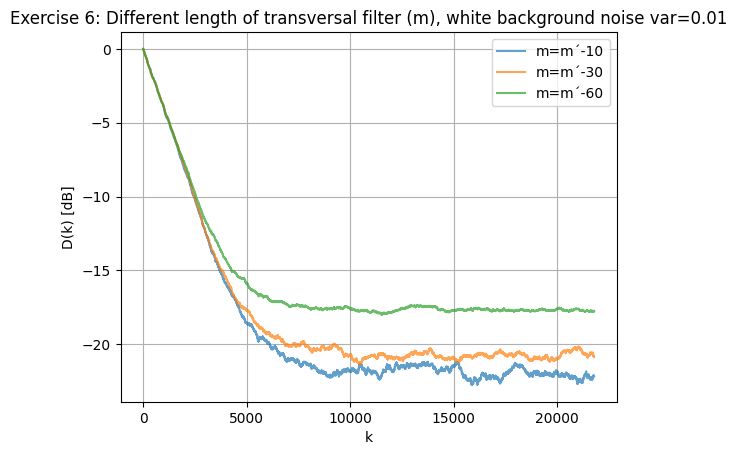

In [47]:
%run echocomp.py 6
# Shorter transversal filter seems to cause slower convergence of the relative system distance
# and a worse end value where the convergence stabilizes

## 4.7

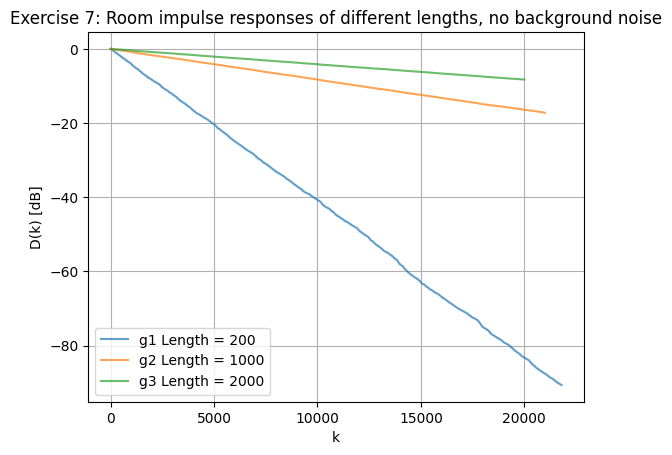

In [49]:
%run echocomp.py 7
# Shorter room impulse responses cause faster relative system distance convergence. 